# **Weight Predictor using Linear Regression**

#### Technical Domain Assignment

Members:
- Adhitya Pratama
- Thomas Felix Brilliant

## Import Library

In [ ]:
from google.colab import drive

In [ ]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('drive/MyDrive/weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [ ]:
# Check null values
data.isnull().sum() 

Gender    0
Height    0
Weight    0
dtype: int64

## Preprocessing Data

In [ ]:
# Convert Weight and Height unit
data['Height'] = data['Height'] * 2.54            # Inch to cm
data['Weight'] = data['Weight'] * 0.45359237      # Lbs/pound to kg

In [ ]:
data

,Gender,Height,Weight
0,Male,187.571423,109.721075
1,Male,174.706036,73.622792
2,Male,188.239668,96.497629
3,Male,182.196685,99.809586
4,Male,177.499761,93.598695
...,...,...,...
9995,Female,168.078536,62.041210
9996,Female,170.350573,77.504378
9997,Female,162.224700,58.275424
9998,Female,175.346978,74.322226


In [ ]:
# Convert Gender (categorical) to number
data['Gender'].replace('Female', 0, inplace=True)        # 0 for female
data['Gender'].replace('Male', 1, inplace=True)          # 1 for male

In [ ]:
data

,Gender,Height,Weight
0,1,187.571423,109.721075
1,1,174.706036,73.622792
2,1,188.239668,96.497629
3,1,182.196685,99.809586
4,1,177.499761,93.598695
...,...,...,...
9995,0,168.078536,62.041210
9996,0,170.350573,77.504378
9997,0,162.224700,58.275424
9998,0,175.346978,74.322226


In [ ]:
X = data.iloc[:, :-1].values   # X for height and gender
y = data.iloc[:, 2].values     # y for weight

## Visualization

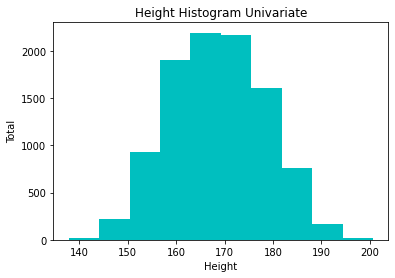

In [ ]:
# Height histogram
plt.hist(x=data.Height, color='c')
plt.title("Height Histogram Univariate")
plt.xlabel("Height")
plt.ylabel("Total")
plt.plot();

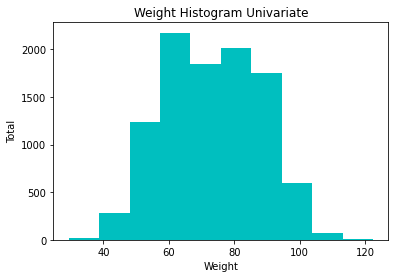

In [ ]:
# Weight histogram
plt.hist(x=data.Weight, color='c')
plt.title("Weight Histogram Univariate")
plt.xlabel("Weight")
plt.ylabel("Total")
plt.plot();

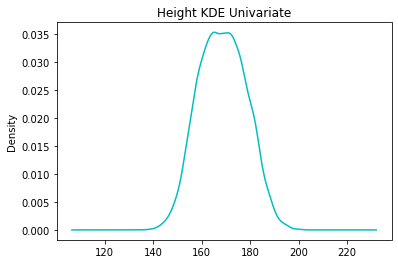

In [ ]:
# KDE distribution for height
data.Height.plot(kind="kde", title='Height KDE Univariate', color='c');

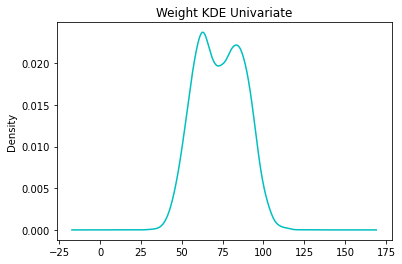

In [ ]:
# KDE distribution for weight
data.Weight.plot(kind="kde", title='Weight KDE Univariate', color='c');

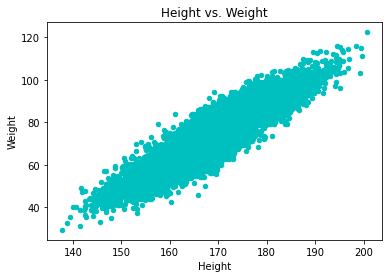

In [ ]:
# Scatter plot between height and weight
data.plot.scatter(x="Height", y="Weight", color='c', title='Height vs. Weight');

## Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Fit Regression Model and Make Prediction

In [ ]:
# Fit regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)

In [ ]:
# Predict test set values
lin_pred = lin_reg.predict(X_test)

## Model Accuracy

In [ ]:
# Use R-squared, Mean Squared Error, and Mean Absolute Error to check model performed
from sklearn import metrics

print('R-squared =', metrics.r2_score(y_test, lin_pred))
print('Mean Squared Error (MSE) =', metrics.mean_squared_error(y_test, lin_pred))
print('Mean Absolute Error (MAE) =', metrics.mean_absolute_error(y_test, lin_pred))

R-squared = 0.9010739569212388
Mean Squared Error (MSE) = 21.149661770805366
Mean Absolute Error (MAE) = 3.677793243368783


## Predict the Weight

In [ ]:
# Test for a male who has height of 180 cm.
weight_pred = lin_reg.predict([[0, 180]])
weight_pred2 = np.array_str(weight_pred, suppress_small=True)
weight_pred3 = float(weight_pred2.translate({ord(i): None for i in '[]'}))

print('Predicted weight =', float("{:.2f}".format(weight_pred3))) # Lbs/pound to kg

Predicted weight = 81.03


## Save Model

In [ ]:
import joblib

joblib.dump(model, "weight-predictor-using-linear-regression.pkl")

['weight-predictor-using-linear-regression.pkl']